In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

In [ ]:
df = pd.read_csv('/content/Titanic-Dataset.csv')

string_list = [each_string.lower() for each_string in df.columns]
df.columns = string_list
df.dropna(inplace=True)
df.head(5)

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S


----Classes----
Classes:  [1 3 2]
Passagers by class:
 [1 1 1]
----Genre----
Genre:  ['female' 'male']
Passagers by sex:
 [95 88]


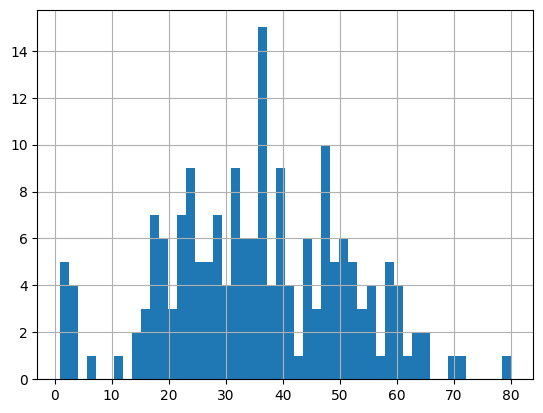

In [ ]:
print('----Classes----')
print('Classes: ', df['pclass'].unique())
print('Passagers by class:\n', df['pclass'].value_counts().value_counts().values)
print('----Genre----')
print('Genre: ', df['sex'].unique())
print('Passagers by sex:\n', df['sex'].value_counts().values)

df['age'].hist(bins =50);

In [ ]:
#binarize columns
X = df[['pclass', 'sex', 'age', 'embarked']].copy()

#using sklearn to binarize
from sklearn import preprocessing
lb=preprocessing.LabelBinarizer()

#transforming sex
X['sex'] = lb.fit_transform(X['sex'])
X['embarked'] = lb.fit_transform(X['embarked'])

X.head(5)

,pclass,sex,age,embarked
1,1,0,38.0,1
3,1,0,35.0,0
6,1,1,54.0,0
10,3,0,4.0,0
11,1,0,58.0,0


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y = df['survived']
#split train-test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.1)

In [ ]:
def print_score(clf, X_train, y_train, X_test, y_test, train=True):
  """Prints the accuracy score, classification report and confusion matrix of classifier"""

  if train:
    # training performance
    print("Train Result:\n")
    print("accuracy score: {:.4f}\n".format(accuracy_score(y_train, clf.predict(X_train))))
    print("Classification Report: \n\n".format(classification_report(y_train, clf.predict(X_train))))
    print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_train, clf.predict(X_train))))

    # cross validation accuracy
    res = cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy')
    print("Average Accuracy: \t {:.4f}".format(np.mean(res)))
    print("Accuracy SD: \t\t {:.4f}".format(np.std(res)))
  else:
    # test performance
    print("Test Result:\n")
    print("accuracy score: {:.4f}\n".format(accuracy_score(y_test, clf.predict(X_test))))
    print("Classification Report: \n\n".format(classification_report(y_test, clf.predict(X_test))))
    print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_test, clf.predict(X_test))))



In [ ]:
#defining the model
rf_clf = RandomForestClassifier(random_state=42, n_estimators = 50)

#fitting
rf_clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50, random_state=42)

In [ ]:
# print the training performance
print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)

# print the test performance
print_score(rf_clf, X_test, y_test, X_test, y_test, train=False)

Train Result:

accuracy score: 0.8659

Classification Report: 


Confusion Matrix: 
 [[ 39  16]
 [  6 103]]

Average Accuracy: 	 0.6033
Accuracy SD: 		 0.0759
Test Result:

accuracy score: 0.7368

Classification Report: 


Confusion Matrix: 
 [[ 2  3]
 [ 2 12]]



Text(0.5, 0, 'Random Forest Feature Importance')

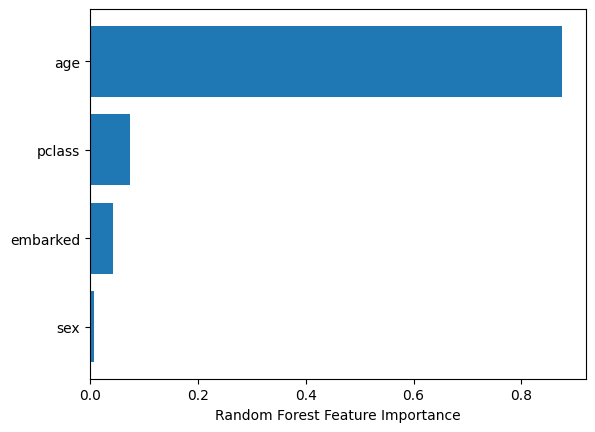

In [ ]:
sorted_idx = rf_clf.feature_importances_.argsort()
plt.barh(X_train.columns[sorted_idx], rf_clf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [ ]:
#defining new Random forest model
rf_clf = RandomForestClassifier(random_state=42)

In [ ]:
#parameters to optimize
params_grid = {"max_depth": [1, 10],
                "min_samples_split": [2, 3, 101], #The minimum number of samples required to split an internal node
                "min_samples_leaf": [1, 3, 101], #minimum number of samples required to be at a leaf node
                "bootstrap": [True, False],
                "criterion": ['gini', 'entropy'], #bootstrap samples are used when building trees
                "n_estimators" : [10, 20, 30]} #splitting criteria


In [ ]:
# defining grid search from sklearn grid_search GridSearchCV
grid_search = GridSearchCV(estimator=rf_clf, param_grid=params_grid, n_jobs=-1, cv=5, verbose=1, scoring='accuracy')

# fitting grid search to training data
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 216 candidates, totalling 1080 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'], 'max_depth': [1, 10],
                         'min_samples_leaf': [1, 3, 101],
                         'min_samples_split': [2, 3, 101],
                         'n_estimators': [10, 20, 30]},
             scoring='accuracy', verbose=1)

In [ ]:
grid_search.best_score_
grid_search.best_estimator_.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 10,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}